## Butterfly Network Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")  # Set linear programming solver
PsiOpts.setting(repr_latex = True)      # Turn on Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)      # Turn on LaTeX in diagrams

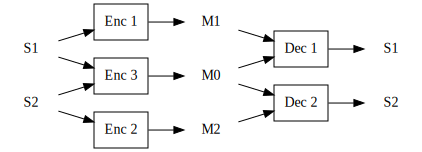

In [2]:
S1, S2 = rv_array("S", 1, 3)
M0, M1, M2 = rv_array("M", 3)
R1, R2 = real_array("R", 1, 3)
C0, C1, C2 = real_array("C", 3)

model = CodingModel()      # Define butterfly network
model.set_rate(S1, R1)     # The rate of S1,S2 are R1,R2 resp.
model.set_rate(S2, R2)
model.set_rate(M0, C0)     # The rate of M0,M1,M2 are C0,C1,C2 resp.
model.set_rate(M1, C1)
model.set_rate(M2, C2)
model.add_node(S1, M1,
        label = "Enc 1")   # Encoder 1 maps S1 to M1
model.add_node(S2, M2,
        label = "Enc 2")   # Encoder 2 maps S2 to M2
model.add_node(S1+S2, M0,
        label = "Enc 3")   # Encoder 3 maps S1,S2 to M0
model.add_node(M0+M1, S1,
        label = "Dec 1")   # Decoder 1 maps M0,M1 to S1
model.add_node(M0+M2, S2,
        label = "Dec 2")   # Decoder 2 maps M0,M2 to S2

model.graph()              # Draw diagram

In [4]:
r = model.get_inner(ndec_mode = "none")  # Automatic inner bound
r

( ( C1 >= 0 )
 &( C2 >= 0 )
 &( R1 >= 0 )
 &( C0 >= 0 )
 &( R2 >= 0 )
 &( R1 <= C0+C1 )
 &( R2 <= C0+C2 )
 &( R1+R2 <= C0+C2+C1 ) )

In [5]:
r_out = model.get_outer()  # Automatic outer bound
bool(r_out >> r)           # Converse proof

True

### References
-  R. Ahlswede, N. Cai, S.-Y. R. Li, and R. W. Yeung, "Network Information Flow," IEEE Transactions on Information Theory, vol. 46, no. 4, pp. 1204-1216, Jul. 2000.
- S.-Y. R. Li, R. W. Yeung, and N. Cai, "Linear Network Coding," IEEE Transactions on Information Theory, vol. 49, no. 2, pp. 371-381, Jul. 2003.